### CONSTANTS

In [1]:
DATA_PATH = "data/predictive_maintenance.csv"
NUMERICAL_FEATURES = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]',
                       'Torque [Nm]', 'Tool wear [min]']
CATEGORICAL_FEATURES = ['Type']
TARGET = "Target"

### Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.plotting import heatmap, scatterplotmatrix

### Functions

In [3]:
def convert_list_to_tuples(lst):
  """Converts a list of strings to a list of tuples, where each tuple contains the string and an index."""
  result = []
  for item in lst:
    for i in range(2):
      result.append((item, i))
  return result

### 0. Reading Data

In [4]:
data = pd.read_csv(DATA_PATH).drop(columns=['UDI', 'Product ID', 'Failure Type'])
print(f"Data shape: {data.shape}")
data.head()

Data shape: (10000, 7)


,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
0,M,298.1,308.6,1551,42.8,0,0
1,L,298.2,308.7,1408,46.3,3,0
2,L,298.1,308.5,1498,49.4,5,0
3,L,298.2,308.6,1433,39.5,7,0
4,L,298.2,308.7,1408,40.0,9,0


### 1. Show basic statistics

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Type                     10000 non-null  object 
 1   Air temperature [K]      10000 non-null  float64
 2   Process temperature [K]  10000 non-null  float64
 3   Rotational speed [rpm]   10000 non-null  int64  
 4   Torque [Nm]              10000 non-null  float64
 5   Tool wear [min]          10000 non-null  int64  
 6   Target                   10000 non-null  int64  
dtypes: float64(3), int64(3), object(1)
memory usage: 547.0+ KB


In [6]:
data.describe()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900
std,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981
min,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000
25%,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000
50%,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000
75%,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000
max,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000


### 2. Data Visualization

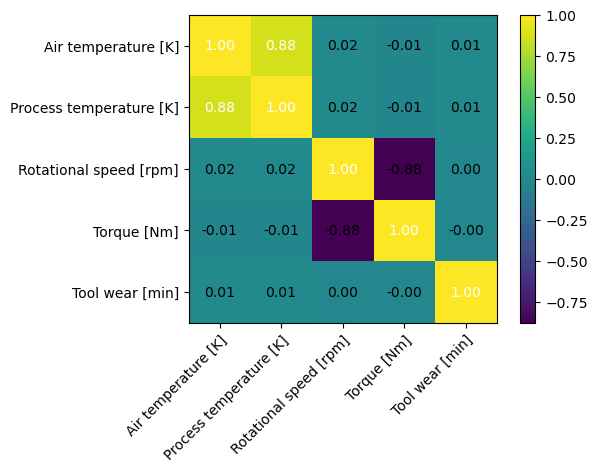

In [5]:
correlations = data[NUMERICAL_FEATURES].corr().values
hm = heatmap(correlations, figsize=(6,4), row_names=NUMERICAL_FEATURES, column_names=NUMERICAL_FEATURES)

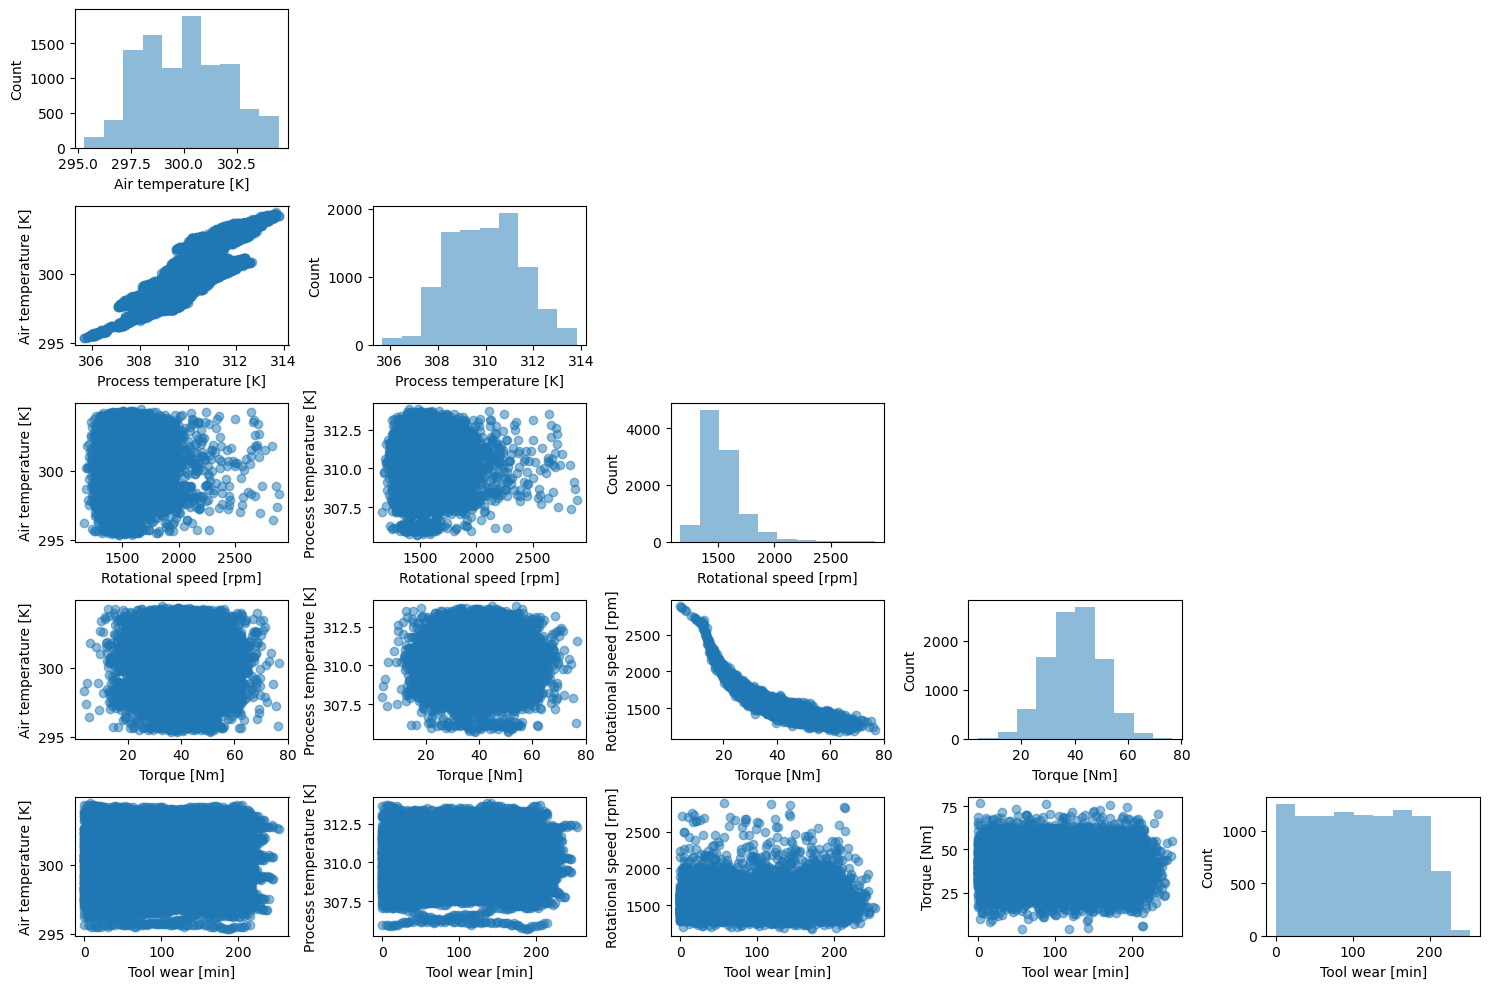

In [8]:
scatterplotmatrix(data[NUMERICAL_FEATURES].values, names=NUMERICAL_FEATURES, figsize=(15,10), alpha=0.5)
plt.tight_layout()

Text(0.5, 1.0, 'Distribution of Classes')

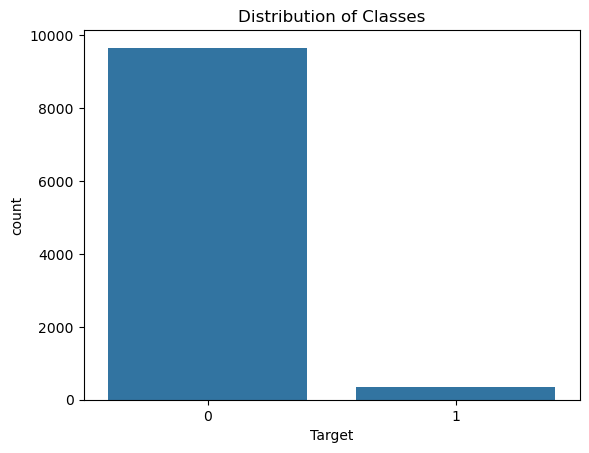

In [11]:
sns.barplot(data[TARGET].value_counts())
plt.title("Distribution of Classes")

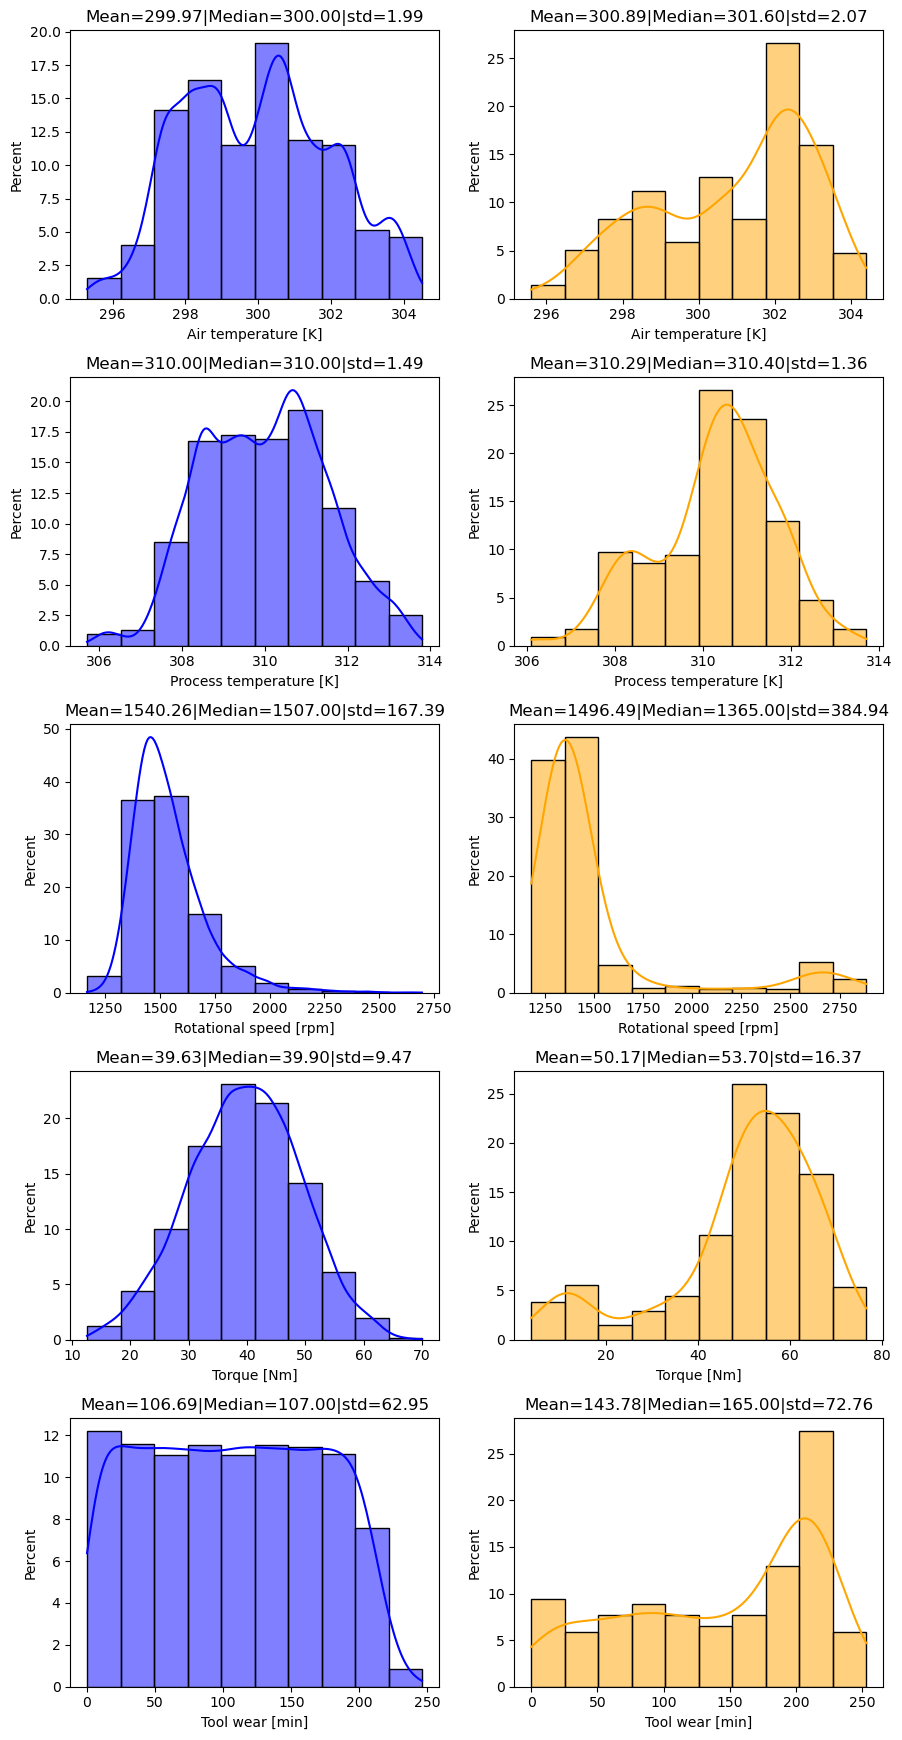

In [9]:
feature_tuples = convert_list_to_tuples(NUMERICAL_FEATURES)
rows = len(NUMERICAL_FEATURES)
cols = 2
fig = plt.figure(figsize=(9, rows*3.5))
for i, (column, target) in enumerate(feature_tuples, 1):
    c = 'blue'
    if target==1:
        c = 'orange'
    x = data[data[TARGET]==target][column]
    fig.add_subplot(rows, cols, i)
    sns.histplot(x=x, bins=10, stat="percent", kde=True, color=c)
    plt.title(f"Mean={x.mean():.2f}|Median={x.median():.2f}|std={x.std():.2f}")

plt.tight_layout()

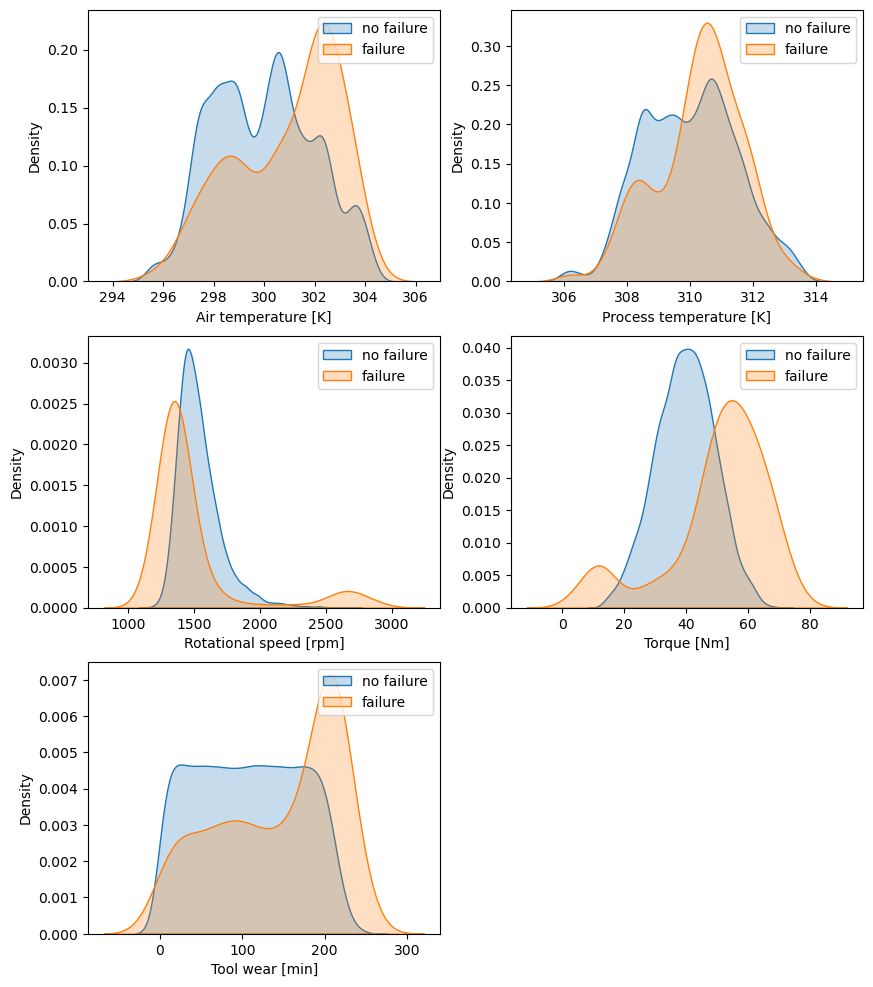

In [59]:
rows = int(np.ceil(len(NUMERICAL_FEATURES)/2))
cols = 2
fig = plt.figure(figsize=(10, rows*4))
for i, column in enumerate(NUMERICAL_FEATURES, 1):
    fig.add_subplot(rows, cols, i)
    sns.kdeplot(data[data[TARGET]==0][column], fill=True, label="no failure")
    sns.kdeplot(data[data[TARGET]==1][column], fill=True, label="failure")
    plt.legend()

<Axes: xlabel='Type', ylabel='count'>

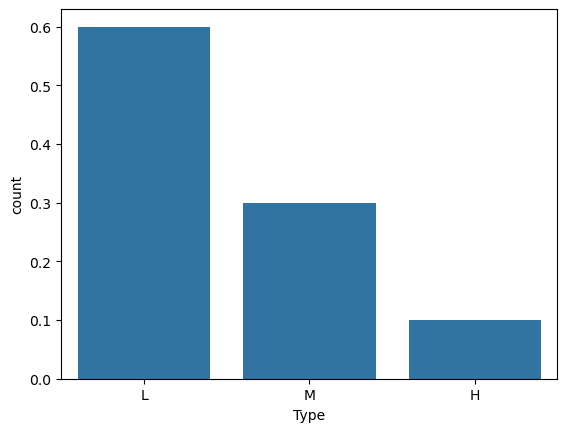

In [12]:
sns.barplot(data['Type'].value_counts()/len(data[TARGET]))

Text(0, 0.5, 'Percent')

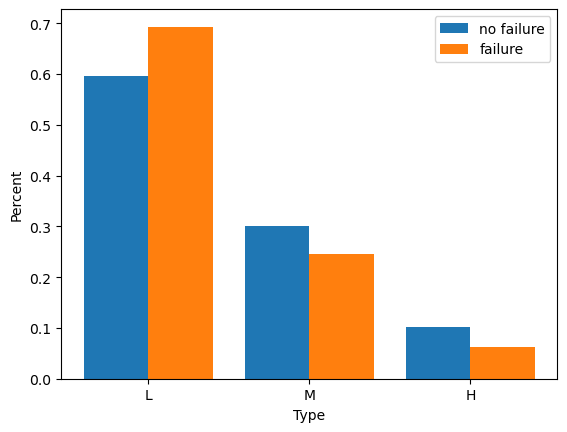

In [60]:
x = data.groupby(data[TARGET])['Type'].value_counts()
x_axis = np.arange(3)
plt.bar(x_axis -0.2, x[0]/x[0].sum(), width=0.4, label = 'no failure')
plt.bar(x_axis +0.2, x[1]/x[1].sum(), width=0.4, label = 'failure')
plt.xticks(x_axis, ['L', 'M', 'H'])
plt.legend()
plt.xlabel('Type')
plt.ylabel('Percent')

<Axes: xlabel='Air temperature [K]', ylabel='Process temperature [K]'>

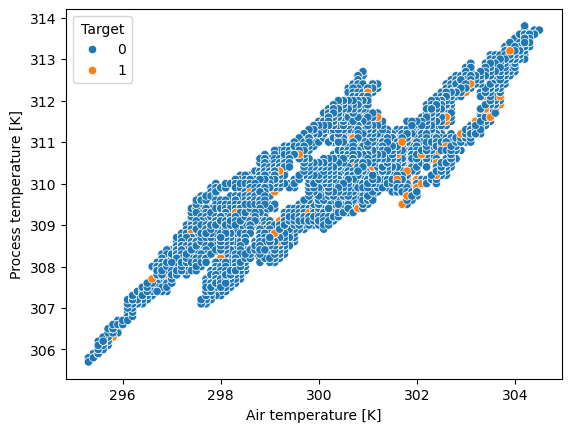

In [19]:
sns.scatterplot(x=data['Air temperature [K]'], y=data['Process temperature [K]'],
                hue=data['Target'])

In [20]:
NUMERICAL_FEATURES

['Air temperature [K]',
 'Process temperature [K]',
 'Rotational speed [rpm]',
 'Torque [Nm]',
 'Tool wear [min]']

<Axes: xlabel='Torque [Nm]', ylabel='Rotational speed [rpm]'>

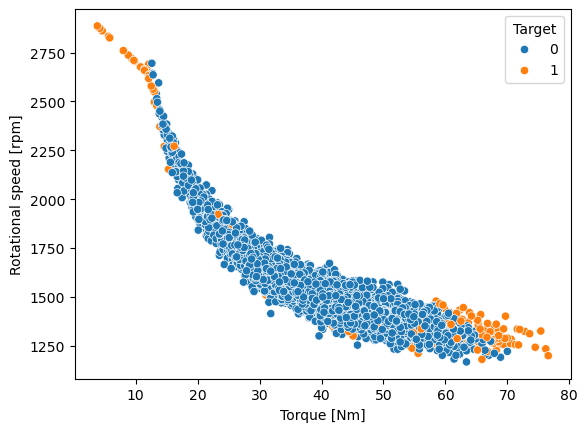

In [21]:
sns.scatterplot(x=data['Torque [Nm]'], y=data['Rotational speed [rpm]'],
                hue=data['Target'])

<Axes: xlabel='Tool wear [min]', ylabel='Rotational speed [rpm]'>

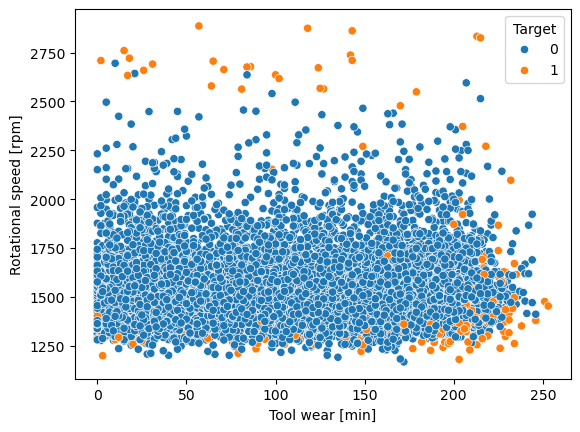

In [24]:
sns.scatterplot(x=data['Tool wear [min]'], y=data['Rotational speed [rpm]'],
                hue=data['Target'])